# Trouver sa position en connaissant la position des balises

In [1]:
import numpy as np
import matplotlib.pyplot as pl
# from matplotlib.pyplot import rcParams
# rcParams['figure.figsize'] = 20, 20
pl.figure(figsize=(15,13))

# %matplotlib inline
%matplotlib notebook

In [2]:
import os
os.chdir("..")

In [3]:
from src.main.constants import *
import src.main.main_script as mm
import src.main.clustering as clus
import src.main.data_cleansing as dacl
import src.main.output_rendering as outr
from src.retrieve_realistic_measures import get_table_measures
import src.check_hough as chh
import src.check_clustering as chc
from src.main.geometry import Point, Vector
from src.main.table import Square, Table

In [4]:
os.getcwd()
os.chdir("src")

In [5]:
np.sqrt(12)

3.4641016151377544

## La position des balises est parfaitement connue

Le robot a pour état (1000, 560, np.pi/6) dans le référentiel de la table.

In [6]:
unknown_robot_state = (1000, 500, np.pi/3)

In [7]:
unknown_robot_point = Point(unknown_robot_state[0], unknown_robot_state[1])

On définit les balises pour s'occuper seulement de leurs centres.

In [8]:
beacon_1 = clus.Beacon()
beacon_1.set_by_upper_left_and_lower_right(beacons_purple[0][0], beacons_purple[0][1])
beacon_1.set_radius(FIX_BEACON_RADIUS)
beacon_2 = clus.Beacon()
beacon_2.set_by_upper_left_and_lower_right(beacons_purple[1][0], beacons_purple[1][1])
beacon_2.set_index(1)
beacon_2.set_radius(FIX_BEACON_RADIUS)
beacon_3 = clus.Beacon()
beacon_3.set_by_upper_left_and_lower_right(beacons_purple[2][0], beacons_purple[2][1])
beacon_3.set_index(2)
beacon_3.set_radius(FIX_BEACON_RADIUS)
beacons = [beacon_1, beacon_2, beacon_3]

Voici les coordonnées des centres des balises dans le référentiel de la table.

In [9]:
print(str(beacon_1)+"\n"+str(beacon_2)+"\n"+str(beacon_3))

(1550.0,1950.0) , 100 n°0
(-1550.0,1000.0) , 100 n°1
(1550.0,50.0) , 100 n°2


Et dans le référentiel du robot.

In [10]:
def beacon_seen_from(robot_state, beacon):
    p1 = Point(robot_state[0], robot_state[1])
    print("p1 "+str(p1))
    p2 = beacon.center
    print("p2 "+str(p2))
    v = Vector()
    v.set_by_points(p1, p2)
    print("v "+str(v))
    angle = v.compute_angle()
    rho = v.compute_distance()
    return rho, angle# - robot_state[2]

Coordonnées polaires dans le référentiel du robot : (rho, theta).

In [11]:
rho_beacon_1_from_robot, theta_beacon_1_from_robot = beacon_seen_from(unknown_robot_state, beacon_1)
rho_beacon_1_from_robot, theta_beacon_1_from_robot

p1 (1000,500)
p2 (1550.0,1950.0)
v 550.0 - 1450.0


(1550.8062419270823, 1.208252089530389)

In [12]:
np.rad2deg(1.108)

63.48372370049522

Vecteur du robot vers la balise 1 avec une rotation de pi/3.

In [13]:
v = Vector()
v.set_by_points(unknown_robot_point, beacon_1.center)
print(beacon_1.center)
str(v.apply_to_point(unknown_robot_point))
print(v.x, v.y, v.compute_angle(), v.compute_distance())
v.rotate(np.pi/3)

(1550.0,1950.0)
550.0 1450.0 1.208252089530389 1550.8062419270823


Point dans le référentiel du robot de la balise 1.

In [14]:
coordinates_from_robot = Point(np.cos(theta_beacon_1_from_robot)*rho_beacon_1_from_robot,
          np.sin(theta_beacon_1_from_robot)*rho_beacon_1_from_robot)
coordinates_from_robot.x, coordinates_from_robot.y

(550.0, 1450.0)

In [15]:
estimated_beacon_position = unknown_robot_point + coordinates_from_robot
str(estimated_beacon_position)

'(1550.0,1950.0)'

Vecteur de la balise 1.

In [16]:
v_balise = Vector()
v_balise.set_by_points(Point(0, 0), beacon_1.center)

Vecteur opposé au vecteur du robot.

In [17]:
v_robot = Vector()
v_robot.set_by_points(unknown_robot_point, Point(0, 0))

Vecteur orientation du robot.

In [18]:
v_robot_orientation = Vector()
v_robot_orientation.create_unitary(unknown_robot_state[2])
v_robot_orientation.x = v_robot_orientation.x*100
v_robot_orientation.y = v_robot_orientation.y*100

Vecteur de la balise 1 depuis le robot.

In [19]:
v_mesure_balise_1_from_robot = Vector()
v_mesure_balise_1_from_robot.set_coordinates(coordinates_from_robot.x, coordinates_from_robot.y)
str(v_mesure_balise_1_from_robot)

'550.0 - 1450.0'

Table vue du robot. On place tout. On fait une translation avec le vecteur du robot pour que le robot soit au centre du repère et on fait une translation de pi/3 pour de le robot soit orientée dans la direction de l'axe (Oy). Et on affiche le vecteur du robot vers la balise 1 avec une rotation de pi/3.

<IPython.core.display.Javascript object>


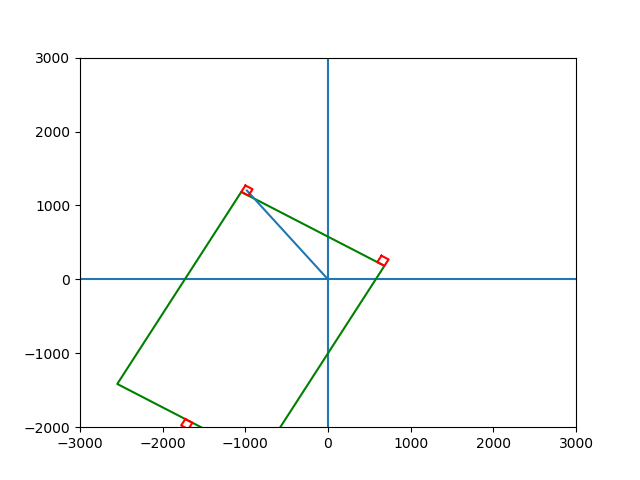

In [20]:
%matplotlib notebook
# table instantiation
table = Table()

table_beacon_1 = Square([Point(-1500 - 100, 2000), Point(-1500, 2000), Point(-1500, 2000 - 100),
                   Point(-1500 - 100, 2000 - 100)])
table_beacon_2 = Square([Point(1500, 1000 + 50), Point(1500 + 100, 1000 + 50), Point(1500 + 100, 1000 - 50),
                   Point(1500, 1000 - 50)])
table_beacon_3 = Square([Point(-1500 - 100, 0 + 100), Point(-1500, 0 + 100), Point(-1500, 0), Point(-1500 - 100, 0)])

table_beacon_1.take_symmetric()
table_beacon_2.take_symmetric()
table_beacon_3.take_symmetric()

table.add_square_obstacle(table_beacon_1)
table.add_square_obstacle(table_beacon_2)
table.add_square_obstacle(table_beacon_3)

table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))


table.translate(v_robot)

# rotation_angle = 0.5
rotation_angle = np.pi/3
table.rotate(rotation_angle)

# measure = Point(0, 1800)
# measure = translation_vector.apply_to_point(measure)
# measure.rotate(rotation_angle)

table.init_plot()
table.plot_edges()

# table.plot_vector(v_balise)
# table.plot_vector(v_robot)
# table.plot_vector_from_point(v_robot, v_robot_orientation)

# table.plot_vector_from_point(v_robot, v_mesure_balise_1_from_robot)
# v_mesure_balise_1_from_robot.rotate(np.pi/3)
# table.plot_vector_from_point(v_robot, v_mesure_balise_1_from_robot)
v_robot.multiplat_by(-1)
table.plot_vector(v)

table.plot_obstacles()
# table.plot_measures(measure, vectors, robot_vector)
table.plot()

Vecteur du robot vers la balise 1.

In [22]:
v_measure = Vector()
v_measure.set_by_points(unknown_robot_point, beacon_1.center)
print(beacon_1.center)
str(v_measure.apply_to_point(unknown_robot_point))
print(v_measure.x, v_measure.y, v_measure.compute_angle(), v_measure.compute_distance())

(1550.0,1950.0)
550.0 1450.0 1.208252089530389 1550.8062419270823


Table vue dans les coordonnées de la table avec le vecteur du robot, le vecteur de la balise 1 et le vecteur du robot vers la balise 1, ainsi que le vecteur orientation du robot.

<IPython.core.display.Javascript object>


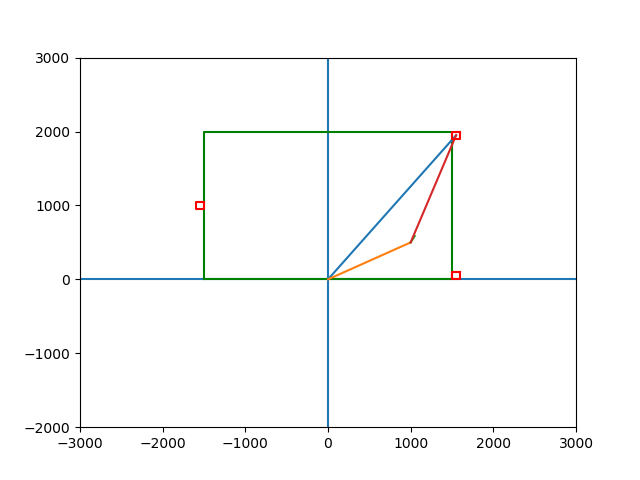

In [23]:
%matplotlib notebook
# table instantiation
table = Table()

table_beacon_1 = Square([Point(-1500 - 100, 2000), Point(-1500, 2000), Point(-1500, 2000 - 100),
                   Point(-1500 - 100, 2000 - 100)])
table_beacon_2 = Square([Point(1500, 1000 + 50), Point(1500 + 100, 1000 + 50), Point(1500 + 100, 1000 - 50),
                   Point(1500, 1000 - 50)])
table_beacon_3 = Square([Point(-1500 - 100, 0 + 100), Point(-1500, 0 + 100), Point(-1500, 0), Point(-1500 - 100, 0)])

table_beacon_1.take_symmetric()
table_beacon_2.take_symmetric()
table_beacon_3.take_symmetric()

table.add_square_obstacle(table_beacon_1)
table.add_square_obstacle(table_beacon_2)
table.add_square_obstacle(table_beacon_3)

table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))


# table.translate(v_robot)
# rotation_angle = np.pi/3
# table.rotate(rotation_angle)

# measure = Point(0, 1800)
# measure = translation_vector.apply_to_point(measure)
# measure.rotate(rotation_angle)

table.init_plot()
table.plot_edges()

table.plot_vector(v_balise)
table.plot_vector(v_robot)
table.plot_vector_from_point(v_robot, v_robot_orientation)

# table.plot_vector_from_point(v_robot, v_mesure_balise_1_from_robot)
# v_mesure_balise_1_from_robot.rotate(np.pi/3)
table.plot_vector_from_point(v_robot, v_measure)


# table.plot_vector_from_point(v_robot, v_measure)

table.plot_obstacles()
# table.plot_measures(measure, vectors, robot_vector)
table.plot()

In [25]:
str(unknown_robot_point)

'(1000,500)'

In [26]:
str(coordinates_from_robot)

'(550.0,1450.0)'

In [27]:
str(estimated_beacon_position)

'(1550.0,1950.0)'

In [28]:
estimated_beacon_position.y

1950.0

In [30]:
str(v.apply_to_point(unknown_robot_point))

'(19.263164512564117,1701.3139720814413)'

## On ne connaît la position que d'une balise